<a href="https://www.kaggle.com/code/sufiinamulhassan/breast-cancer-identification-logistic-regression?scriptVersionId=251320534" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="Title"></a>
<div style="
  position: relative;
  background: linear-gradient(135deg, #ff69b4, #d63384);
  color: white;
  font-family: 'Pacifico', cursive;
  font-size: 26px;
  font-weight: bold;
  text-align: center;
  padding: 25px 50px;
  border-radius: 25px;
  margin: 30px 0;
  box-shadow: 0 10px 20px rgba(0,0,0,0.3);
">
  🎀 Breast Cancer Classification: Diagnosis, Prediction & Model Comparison 🎀
  <div style="
    content: '';
    position: absolute;
    top: 100%;
    left: 50%;
    width: 0;
    height: 0;
    border-left: 25px solid transparent;
    border-right: 25px solid transparent;
    border-top: 25px solid #d63384;
    transform: translateX(-50%);
  "></div>
</div>


<a id="About"></a>
<div style="text-align:center; border-radius:15px 50px; padding:10px; overflow:hidden;">
    <a href="https://www.emro.who.int/fr/noncommunicable-diseases/campaigns/breast-cancer-awareness-month-2022.html" 
       target="_blank" 
       style="text-decoration:none;">
        <img src="http://www.emro.who.int/images/stories/ncds/bcam_2022_banner.jpg" 
             alt="Breast Cancer Awareness Poster" 
             style="width:100%; max-width:800px; border: 6px solid #d63384; border-radius: 20px; display:block; margin:auto; box-shadow: 0px 6px 20px rgba(0,0,0,0.3);">
    </a>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


## Imports the Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from matplotlib.patches import Rectangle

## Load dataset

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

## Convert target to 0/1

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Exploratory Data Analysis

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Moon plot (synthetic sample plot)

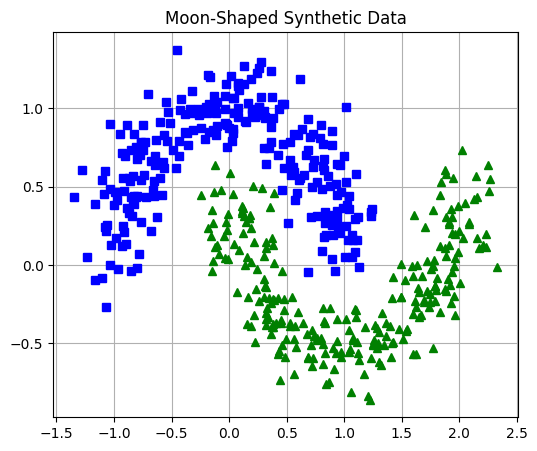

In [6]:
X_moon, y_moon = make_moons(n_samples=500, noise=0.15, random_state=42)
plt.figure(figsize=(6,5))
plt.title("Moon-Shaped Synthetic Data")
plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], "bs")
plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], "g^")
plt.grid(True)
plt.show()

## Rectangle Plot of Mean Radius vs Mean Texture

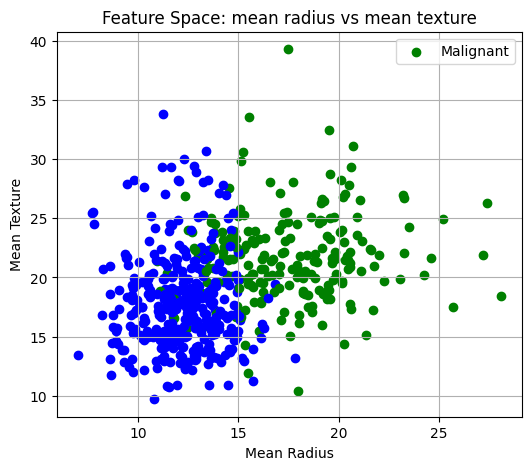

In [7]:
plt.figure(figsize=(6,5))
plt.title("Feature Space: mean radius vs mean texture")
for i in range(len(df)):
    if df['diagnosis'][i] == 0:
        plt.scatter(df['radius_mean'][i], df['texture_mean'][i], color='blue', label='Benign' if i == 0 else "")
    else:
        plt.scatter(df['radius_mean'][i], df['texture_mean'][i], color='green', label='Malignant' if i == 1 else "")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend()
plt.grid(True)
plt.show()

## Pairplot of key features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

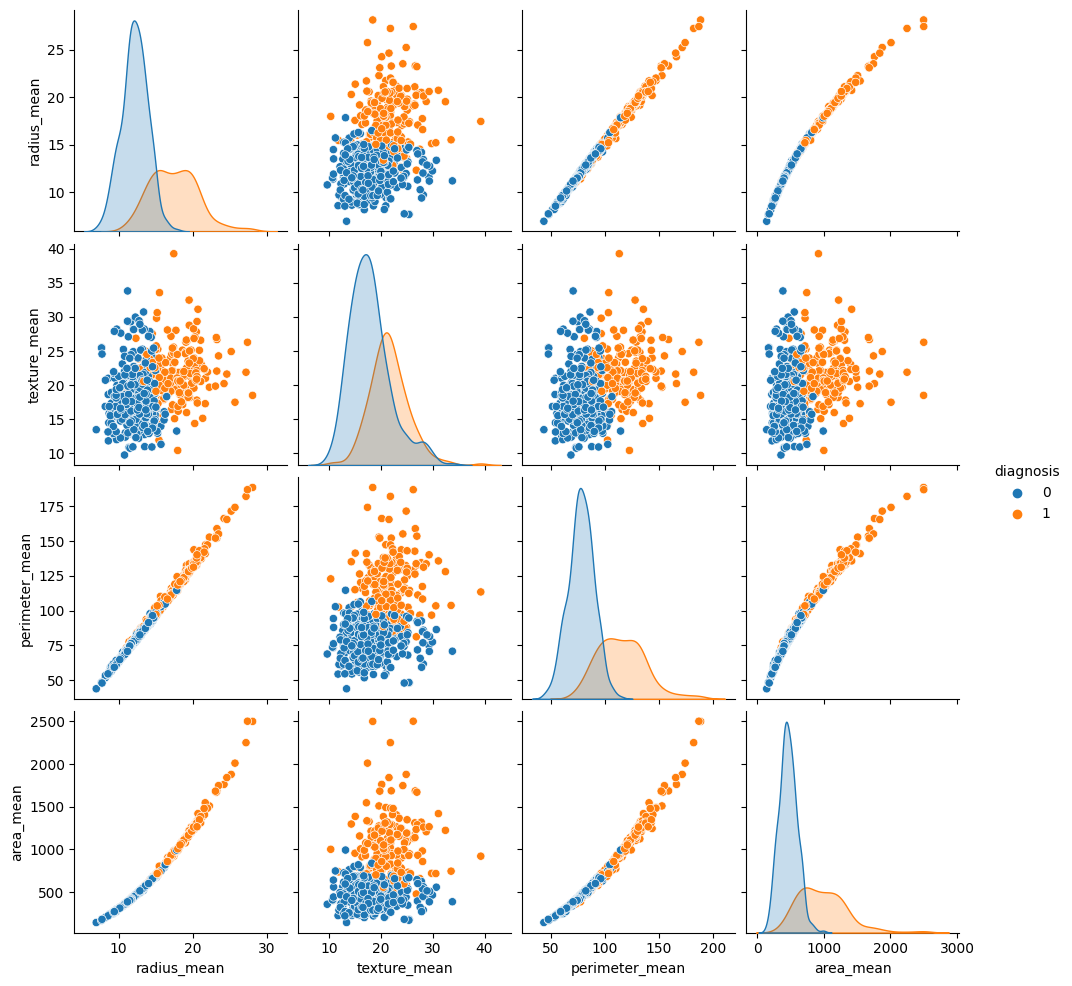

In [8]:
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis')
plt.show()

## Data split

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression (No Regularization)

In [11]:
lr = LogisticRegression(penalty='none', solver='saga', max_iter=10000)
lr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none', solver='saga')

## Logistic Regression (L2 Regularization)

In [12]:
lr_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
lr_l2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, solver='saga')

## Custom Logistic Regression via Gradient Descent

In [13]:
class CustomLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.theta) + self.bias
            y_pred = self.sigmoid(linear_model)
            error = y_pred - y

            self.theta -= self.lr * np.dot(X.T, error) / len(y)
            self.bias -= self.lr * np.sum(error) / len(y)

    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        return (self.sigmoid(linear_model) >= 0.5).astype(int)

## Train custom model

In [14]:
gd_model = CustomLogisticRegression(lr=0.01, n_iter=10000)
gd_model.fit(X_train_scaled, y_train)

## Create a wrapper for decision boundary

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class CustomGDModel:
    def __init__(self, theta, scaler):
        self.theta = theta
        self.scaler = scaler

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        z = np.dot(X_scaled, self.theta)
        return (sigmoid(z) > 0.5).astype(int)

custom_model = CustomGDModel(theta=gd_model.theta, scaler=scaler)

## PCA transformation (2D) for plotting

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
components = pca.components_

## Function for boundary plotting

In [17]:
def plot_boundary(model, X_raw, y, title):
    X_proj = pca.transform(scaler.transform(X_raw))
    x_min, x_max = X_proj[:, 0].min()-1, X_proj[:, 0].max()+1
    y_min, y_max = X_proj[:, 1].min()-1, X_proj[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    X_inv = scaler.inverse_transform(pca.inverse_transform(grid))
    Z = model.predict(X_inv)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)

## Wrap logistic models for predict()

In [18]:
model_plain = lr
model_l2 = lr_l2

## Plot all models' decision boundaries

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


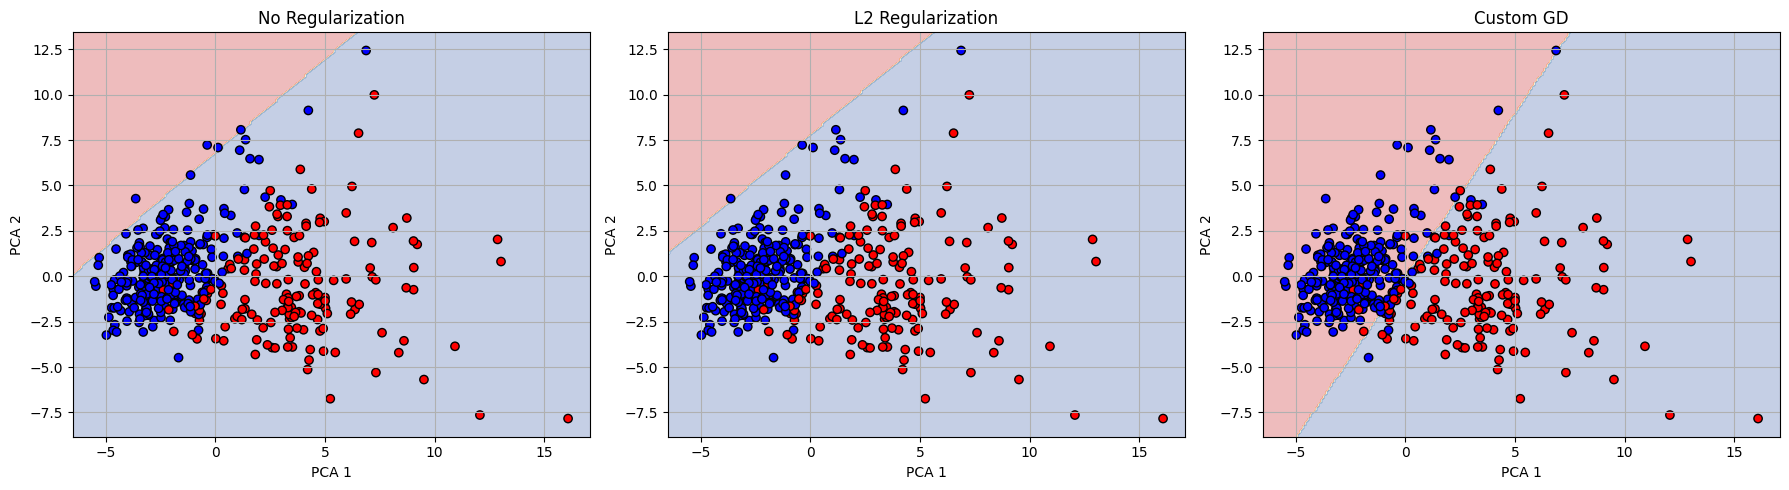

In [19]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plot_boundary(model_plain, X_train, y_train, "No Regularization")

plt.subplot(1, 3, 2)
plot_boundary(model_l2, X_train, y_train, "L2 Regularization")

plt.subplot(1, 3, 3)
plot_boundary(custom_model, X_train, y_train, "Custom GD")
plt.tight_layout()
plt.show()

## Accuracy Comparison

In [20]:
from sklearn.metrics import accuracy_score

acc_plain = accuracy_score(y_test, lr.predict(X_test_scaled))
acc_l2 = accuracy_score(y_test, lr_l2.predict(X_test_scaled))
acc_gd = accuracy_score(y_test, gd_model.predict(X_test_scaled))

results = pd.DataFrame({
    "No Regularization": [acc_plain],
    "L2 Regularization": [acc_l2],
    "Custom Gradient Descent": [acc_gd]
})
results = results.round(4)
results.T.columns = ['Accuracy']
results

,No Regularization,L2 Regularization,Custom Gradient Descent
0,0.9561,0.9737,0.9825
